In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('dataset_SCL.csv')

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h3> Exploratory Data Analysis </h3>

In [48]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


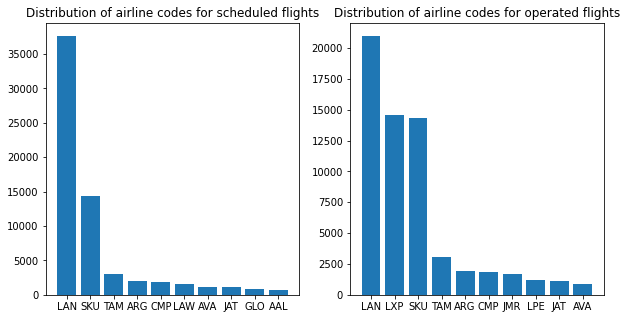

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data['Emp-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Emp-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of airline codes for scheduled flights")

axs[1].set_title("Distribution of airline codes for operated flights")


plt.show()

<AxesSubplot:>

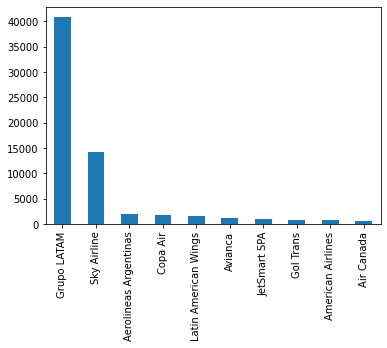

In [68]:
data['OPERA'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

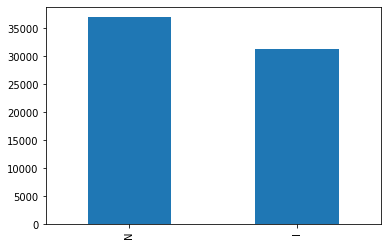

In [63]:
data['TIPOVUELO'].value_counts().plot(kind='bar')

In [7]:
data['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

<AxesSubplot:>

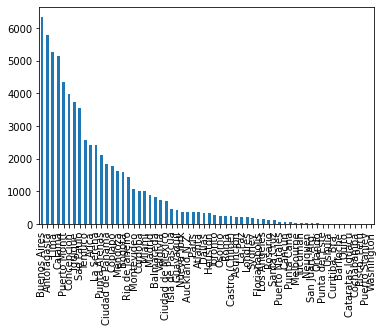

In [14]:
data['SIGLADES'].value_counts().plot(kind='bar')

<AxesSubplot:>

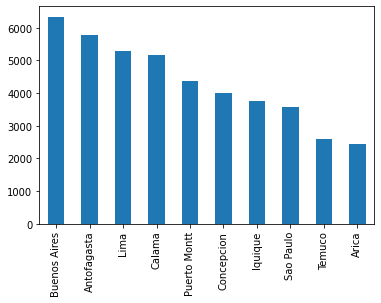

In [15]:
data['SIGLADES'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

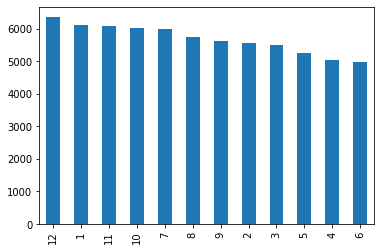

In [17]:
data['MES'].value_counts().plot(kind='bar')

In [49]:
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

In [54]:
def time_of_year(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month < 8:
        return 'Summer'
    elif 9 <= month < 11:
        return 'Autumn'
    else:
        return 'Winter'

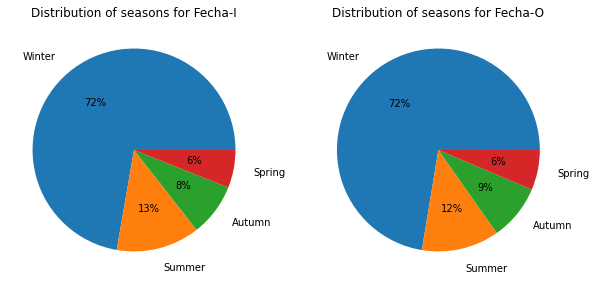

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_year1 = data['Fecha-I'].apply(lambda x: time_of_year(x.hour))
axs[0].pie(time_of_the_year1.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_year2 = data['Fecha-O'].apply(lambda x: time_of_year(x.hour))
axs[1].pie(time_of_the_year2.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs[0].set_title("Distribution of seasons for Fecha-I")

axs[1].set_title("Distribution of seasons for Fecha-O")


plt.show()


In [34]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 0:
        return 'evening'
    else:
        return 'night'

<AxesSubplot:>

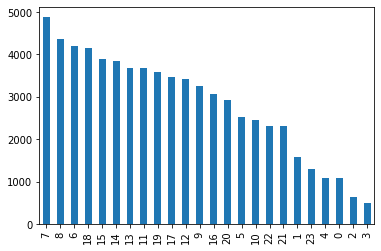

In [50]:
time = data['Fecha-I'].apply(lambda x: x.hour)
time.value_counts().plot(kind='bar') 

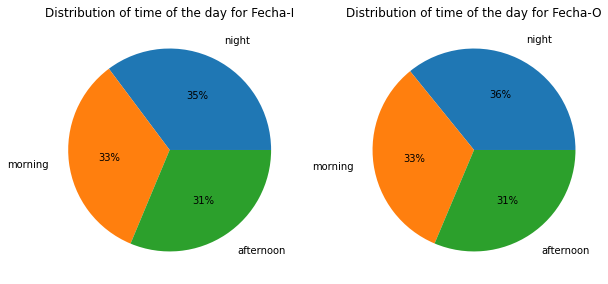

In [92]:
fig, axs1 = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_day1 = data['Fecha-I'].apply(lambda x: time_of_day(x.hour))
axs1[0].pie(time_of_the_day1.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_day2 = data['Fecha-O'].apply(lambda x: time_of_day(x.hour))
axs1[1].pie(time_of_the_day2.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs1[0].set_title("Distribution of time of the day for Fecha-I")

axs1[1].set_title("Distribution of time of the day for Fecha-O")


plt.show()